In [64]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
from scipy import optimize
import seaborn as sns; sns.set(); sns.set_context("talk")

In [86]:
import csv
with open('pokemon_numbers.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    count = 0 
    Class = []
    Instance = []
    Win_Count = []
    Lose_Count = []
    Draw_Count = []
    ELO = []
    Kde_Tier = []
    Diff_Tier = []
    for row in reader: 
        #print(row['Class'])
        Class.append(row['Class'])
        Instance.append(row['Instance'])
        Win_Count.append(row['Win_Count'])
        Lose_Count.append(row['Lose_Count'])
        Draw_Count.append(row['Draw_Count'])
        ELO.append(row['ELO'])
        Kde_Tier.append(row['Kde_Tier'])
        Diff_Tier.append(row['diff_Tier'])
sig0 = 3.
# Now change the number string to a number list
Class = list(map(float, Class))
ELO = list(map(float, ELO))
Instance = list(map(float, Instance))
Win_Count = list(map(float, Win_Count))
Lose_Count = list(map(float, Lose_Count))
Draw_Count = list(map(float, Draw_Count))
Kde_Tier = list(map(float, Kde_Tier))
Diff_Tier = list(map(float, Diff_Tier))

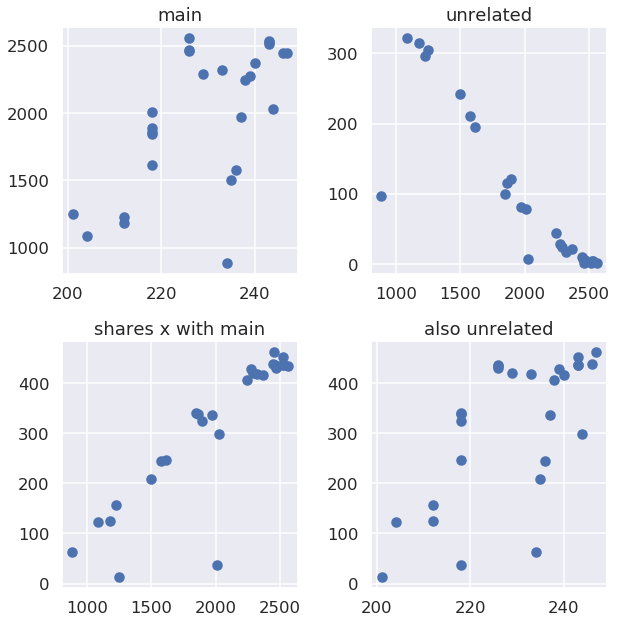

In [99]:
fig, axs = plt.subplots(2, 2, figsize=(9,9))
axs[0, 0].scatter(Class, ELO)
axs[0, 0].set_title("main")
axs[1, 0].scatter(ELO, Win_Count)
axs[1, 0].set_title("shares x with main")
axs[0, 1].scatter(ELO, Lose_Count)
axs[0, 1].set_title("unrelated")
axs[1, 1].scatter(Class, Win_Count)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

In [ ]:
e = sig0*np.ones_like(y)

## Let's Look, Together, at Outliners

In [ ]:
def residuals(theta, x=x, y=y, sigma0=sig0):
    """
    Residuals between data y (a vector at points x) and the theoretical model,
    which here is a straight line with theta[0] = b and theta[1] = m.
    """
    delta_y = y - theta[0] - theta[1] * x
    return delta_y / sigma0

 
def log_posterior_gaussian(theta):
    """
    Returns the logarithm of the posterior, with a standard chi^2 likelihood 
    in terms of the residuals, with Gaussian errors as specified and a
    uniform prior assumed for theta between 0 and 100.
    """
    if (all(theta > 0) and all(theta < 100)):
        return -0.5 * np.sum(residuals(theta)**2)
    else:
        return -np.inf  # recall log(0) = -inf  

def squared_loss(theta, x=x, y=y, sigma0=sig0):
    """Loss function is sum of squared residuals divided by 2, which
        is what we usually call chi^2 / 2. 
    """
    delta_y = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (delta_y / sigma0) ** 2)

# Find the maximum likelihood estimate (MLE) for theta by minimizing the
#  square_loss function using scipy.optimize.fmin. (Minimizing chi^2 gives
#  the same result as maximizing e^{chi^2/2}.)
theta_MLE = optimize.fmin(squared_loss, [0, 0], disp=False)
print(f"MLE: theta0 = {theta_MLE[0]:.1f}, theta1 = {theta_MLE[1]:.2f}")

# Plot the MLE fit versus the data
xfit = np.linspace(0, 100)
yfit = theta_MLE[0] + theta_MLE[1] * xfit

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.errorbar(x, y, sig0, fmt='o', color='blue')
ax.plot(xfit, yfit, color='black')
ax.set_title('Maximum Likelihood fit: Squared Loss');